## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.query("converted == 1").count()[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
d=df.query('group == "control" and landing_page == "new_page" or group == "treatment" and landing_page == "old_page"').count()
d

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#remove rows where treatment != new_page and control != old_page

df1 = df.query("landing_page == 'old_page' and group=='control'")
df3 = df.query("landing_page == 'new_page' and group=='treatment'")
df2 = df1.append(df3)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

3a. How many unique **user_id**s are in **df2**?

In [10]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(['user_id'], inplace = True)

4a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.head()
con_df = df2.query("group == 'control'")
con_df
con_prob = con_df.query("converted=='1'").count() / con_df.query("group == 'control'").count()
con_prob


user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.head()
treat_df = df2.query("group == 'treatment'")
prob_treat = treat_df.query("converted == '1'").count()/treat_df.query("group == 'treatment'").count()
prob_treat

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [17]:
df2.head()
pages = df2["landing_page"].count()
pages
new_p = df2.query("landing_page == 'new_page'").count()/pages
new_p


user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


In the experiment, half of the participants were given the new page (treatment group) and the other half were given the old page to test (control group). It was found that regardless of the page being tested, there is a conversion rate of 12%. The conversion rate for the treatment and control groups were also 12%. Therefore, there is not enough evidence to show that the new page is better than the old page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: **$p_{old}$** => **$p_{new}$**
Alternative Hypothesis: **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
new_page_converted.mean()

0.1195168949143211

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
old_page_converted.mean()

0.12023486652807798

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.0019389468388841397

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [34]:

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [37]:
p_diffs

[0.00028670864015788167,
 -0.0036982051776460884,
 -0.0012616437026039262,
 0.0013469398679149952,
 0.00018358167469012532,
 3.225966759629051e-05,
 -0.0005251914472525626,
 0.0009272039767203588,
 0.0006446580546339287,
 -0.0002428518751663583,
 -0.0006012003466676213,
 0.0005968808291239996,
 -1.5723907913864354e-05,
 -0.00033931187866652335,
 0.0005970581878018688,
 -0.0020460283723083422,
 -0.0012135271080853521,
 -0.0012136464841185496,
 -0.0019016581242898428,
 0.00020423571803164509,
 0.001257504954481986,
 -0.0011792048879157302,
 0.0005207747235104893,
 0.000803278011299341,
 -7.793502223620019e-05,
 0.0015603604347855932,
 0.0003008799016972902,
 -0.0010276935845406898,
 -0.0003736903761089455,
 0.0011747233600413465,
 0.0007137390701802832,
 -0.001660786943845513,
 0.0015600295926364721,
 -0.0009103970629054381,
 -0.000993202532552681,
 -0.0017023388987106314,
 0.0004589643715852826,
 0.0008857696925165248,
 -0.0005663460504643503,
 -0.00015328735346875622,
 0.00025961274393

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

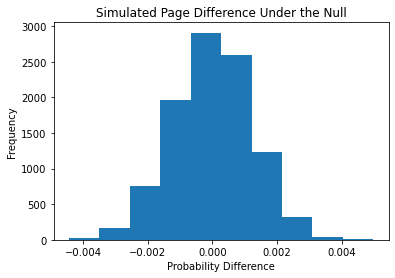

In [26]:
plt.xlabel('Probability Difference')
plt.ylabel('Frequency')
plt.title('Simulated Page Difference Under the Null')
plt.hist(p_diffs);

#the plot does look like as expected as the Null hypothesis states that there is no difference in the conversion 
#rates between old and new. Therefore, this means that the majority of the probability difference should be around 0. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [54]:
obs_diff = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
obs_diff

#the observed difference shows that the old page has better conversion rates than the new page 

-0.0016367945992569882

In [55]:
#calculate the p-value (the right of the actual observed difference)

(p_diffs > obs_diff).mean()

0.9141

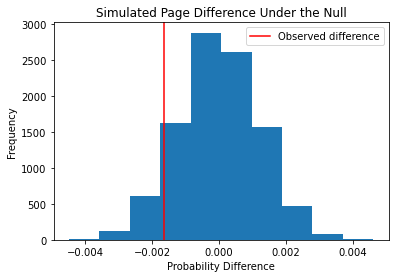

In [57]:
# plot line for observed statistic against the simulated null
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r', label="Observed difference")
plt.xlabel('Probability Difference')
plt.ylabel('Frequency')
plt.title('Simulated Page Difference Under the Null');
plt.legend()
plt.show()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We are calculating the p-value, the pvalue tells us whether to reject the null hypothesis or not. In this case, the new page does not have a better conversion rate than the old page, therefore, the difference in conversion rates is negative. Also, it was found that p-value is > 0.9 which is close to 1. Therefore, we are over 90% confident that the actual conversion difference is not statistically significant and we do not have enough evidence to reject the null hypothesis (no other distribution better describes the data better than the null). 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])
convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.

In [78]:
#what is the z-score and p-value?

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z_score : ',z_score)
print('p_value : ',p_value)

z_score :  1.3109241984234394
p_value :  0.9050583127590245


In [79]:
norm.cdf(z_score)

0.9050583127590245

In [61]:
#what is the critical value that gives 95% confidence? 
from scipy.stats import norm

norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score gives an indication of how far the statistic is to the mean of the distribution. Therefore, we need to calculate the critical value (a cut off value) that we are 95% confident that the data did come from the null or not. The critical value was found to be 1.64, and the z-score is below this value. In addition, the p-value was found to be close to one. Taking both z-score and p-value into account, there is enough evidence to shows that we cannot reject the null hypotesis.

Note: the reason why we have the z-score as positive instead of negative (like shown in the p_diffs) is because the z-score table will only show the percentage of values below the z-score. Therefore, if the z-score was negative, then the p-value will be 0.09. This would be untrue as we want to look at the p-value on the right of the z-score. We can do this by making the z-score positive and gain the p-value of 0.91, which is similar to the value found previously. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [80]:
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

# we need to add a column for our intercept as statsmodels does not automatically do this. If we set the intercept column = 1, 
#then the coefficent of our intercept = 1.  

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [81]:
import statsmodels.api as sm
import scipy.stats as stats
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [82]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:57:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [84]:
np.exp(-0.0150) 
#when the value is less than 1, it is better to show the reciprocal. It changes the direction of a unit increase to a unit decrease

0.9851119396030626

In [85]:
1/np.exp(-0.0150)

#For each 1 unit decrease when the individual receives the new page, the conversion rate is 1.02 times as likely. 

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The null hypothesis is p_new - p_old = 0 and the alternative hypothesis is p_new - p_old != 0. With this new hypothesis in the regression model compared to the hypotheses shown in part II, will mean that there are different p-values. In part II, the p-values were calculated using a one sided z-test. Whereas, in the logisitic regression, a two sided test will be used. The two-tailed test uses both the positive and negative tails of the distribution. 
In part II, the p-value was found to be 0.9 which showed that the probability difference in conversions likely came from the null hypothesis.
The LLR p-value is > 0.05 (0.1899), which shows that there is a poor correlation between the data and the regression model. The p-value associated with ab_page was found to be 0.19. This shows that the p-value is too large to be found as being statistically significant. Therefore, the new page does not produce more conversions than the old page. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are many factors we may need to consider which affect the rate of conversion. For example, their age, gender, how much time they spent on a website previously may give a bias towards the older version of the website. These factors are important to note, however, there was disadvantages into adding additional terms because they may skew the results which leads to unreliable results compared to previous analysis.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.

In [86]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,control
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [87]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [88]:
#mean of conversion rate
df_new.ab_page.mean()

0.5000619442226688

In [89]:
df_new.groupby(['country'], as_index=False).mean()

,country,converted,intercept,ab_page,control,CA,UK,US
0,CA,0.115318,1.0,0.503552,0.496448,1.0,0.0,0.0
1,UK,0.120594,1.0,0.498247,0.501753,0.0,1.0,0.0
2,US,0.119547,1.0,0.500459,0.499541,0.0,0.0,1.0


In [96]:
#Fit Regression Model And Obtain the Results

df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:20:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [97]:
np.exp(0.0506), np.exp(0.0408)

#Compared to Canada, the UK are 1.05 more likely to convert 
#Compared to Canada, the US are 1.04 more likely to convert

(1.0519020483004984, 1.0416437559600236)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  



In [91]:
#mean conversion rate by country and landing_page - 
#checking for possible interactions (whether the influence of landing_page
#is different for the countries)

df_new.groupby(['country','ab_page'], as_index=False).mean()

,country,ab_page,converted,intercept,control,CA,UK,US
0,CA,0,0.118783,1.0,1,1,0,0
1,CA,1,0.111902,1.0,0,1,0,0
2,UK,0,0.120022,1.0,1,0,1,0
3,UK,1,0.121171,1.0,0,0,1,0
4,US,0,0.120630,1.0,1,0,0,1
5,US,1,0.118466,1.0,0,0,0,1


In [92]:
df_new.head()
df_new['interaction_us_ab_page'] = df_new.US *df_new.ab_page
df_new['interaction_ca_ab_page'] = df_new.CA *df_new.ab_page

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control,CA,UK,US,interaction_us_ab_page,interaction_ca_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,0


In [93]:
### Fit Your Regression Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US','ab_page']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:15:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

#### Answer
The p-values for all countries are higher than 0.05, therefore, there are no significant effects on the conversion between page and country. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

### Conclusions
In conclusion, there is not enough evidence to reject the null hyptothesis and therefore, there are not more new page conversions compared to the old one. This evidence is shown on the probability figures, A/B test and regression models. There is no strong evidence to say that the countries (US, CA, or UK) influence the conversion rate. New features for the new page may be tested in order to get better conversion rates than the old page. 